# DATA MINING - WEEK 6
## NGUYEN XUAN VIET DUC - 22280012
### Lesson 6: GROUP ANALYSIS

In [17]:
!source venv/bin/activate

#### 1. K-means algorithm

In [18]:
import numpy as npss
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

blobs = pd.read_csv('data.csv')
colnames = list(blobs.columns[1:-1])
print(blobs.head())

   ID       x       y  cluster
0   0  24.412  32.932        2
1   1  35.190  12.189        1
2   2  26.288  41.718        2
3   3   0.376  15.506        0
4   4  26.116   3.963        1


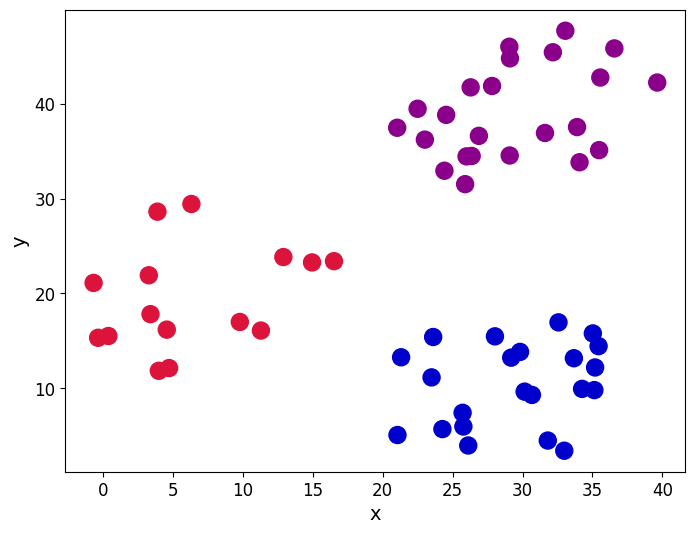

In [19]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['x'], y=blobs['y'], s=150, 
            c=blobs['cluster'].astype('category'), 
            cmap=customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [20]:
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k = 3
df = blobs[['x', 'y']]
centroids = initiate_centroids(k, df)
print(centroids)

         x       y
0   24.412  32.932
5   25.893  31.515
36  26.878  36.609


In [21]:
def rsserr(a, b):
    '''
    Calculate the root of sum of squared errors.
    a and b are numpy arrays
    '''
    return np.sum(np.square(a - b))

for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid, :], df.iloc[36, :])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 19.60
Error for centroid 1: 26.92
Error for centroid 2: 0.00


In [22]:
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid.
    - dset: pandas dataframe with observations
    - centroids: pandas dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs, :])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid = np.where(all_errors == np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [23]:
df.loc[:, 'centroid'], df.loc[:, 'error'] = centroid_assignation(df, centroids)
print(df.head())

        x       y  centroid       error
0  24.412  32.932         0    0.000000
1  35.190  12.189         1  459.928485
2  26.288  41.718         2   26.449981
3   0.376  15.506         0  881.394772
4  26.116   3.963         1  759.162433


/tmp/ipykernel_276794/765806957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'centroid'], df.loc[:, 'error'] = centroid_assignation(df, centroids)


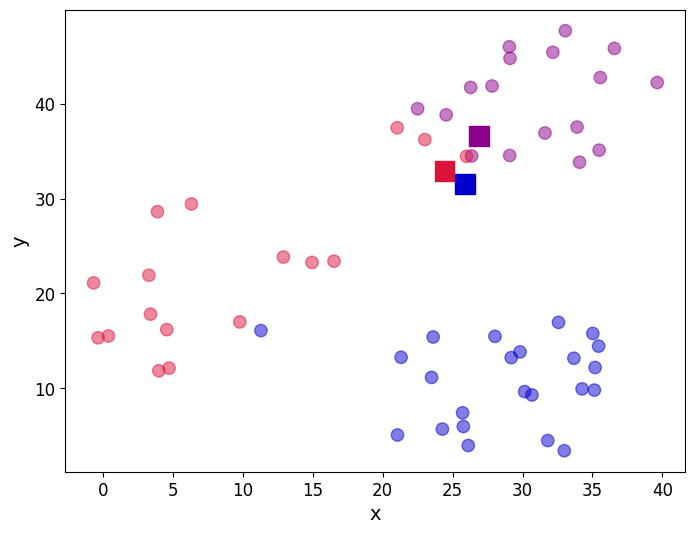

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o', 
            c=df['centroid'].astype('category'), 
            cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], 
            marker='s', s=200, c=[0, 1, 2], 
            cmap=customcmap)

ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [25]:
print("The total error is {0:.2f}".format(df['error'].sum()))

The total error is 20606.95


In [26]:
centroids = df.groupby('centroid').agg("mean").loc[:, colnames].reset_index(drop=True)
print(centroids)

           x          y
0   9.889444  23.242611
1  28.435750  11.546250
2  30.759333  40.311167


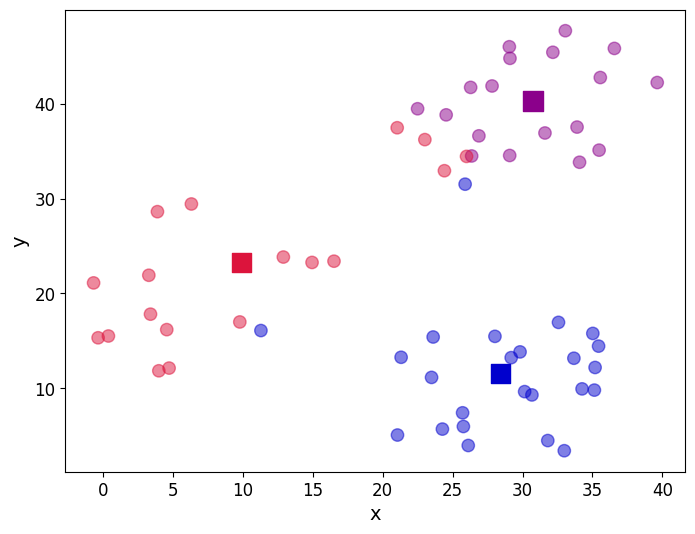

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o', 
            c=df['centroid'].astype('category'), 
            cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], 
            marker='s', s=200, c=[0, 1, 2], 
            cmap=customcmap)

ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [28]:
def kmeans(dset, k=2, tol=1e-4):
    '''
    K-means implementation for a
    `dset`: DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    # Let us work in a copy, so we don't mess the original
    working_dset = dset.copy()
    # We define some variables to hold the error, the
    # stopping signal and a counter for the iterations
    err = []
    goahead = True
    j = 0

    # Step 2: Initiate clusters by defining centroids
    centroids = initiate_centroids(k, dset)

    while(goahead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
        err.append(sum(j_err))

        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop=True)

        # Step 6 - Restart the iteration
        if j > 0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1] - err[j] <= tol:
                goahead = False

        j += 1

    return working_dset['centroid'], j_err, centroids

In [29]:
np.random.seed(432)
df['centroid'], df['error'], centroids = kmeans(df[['x', 'y']], 3)
print(df.head())

        x       y  centroid      error
0  24.412  32.932         0  61.380524
1  35.190  12.189         1  37.415091
2  26.288  41.718         0  16.216075
3   0.376  15.506         2  51.798518
4  26.116   3.963         1  52.188602


In [30]:
print(centroids)

           x          y
0  29.304957  39.050783
1  29.330864  10.432409
2   6.322867  19.559800


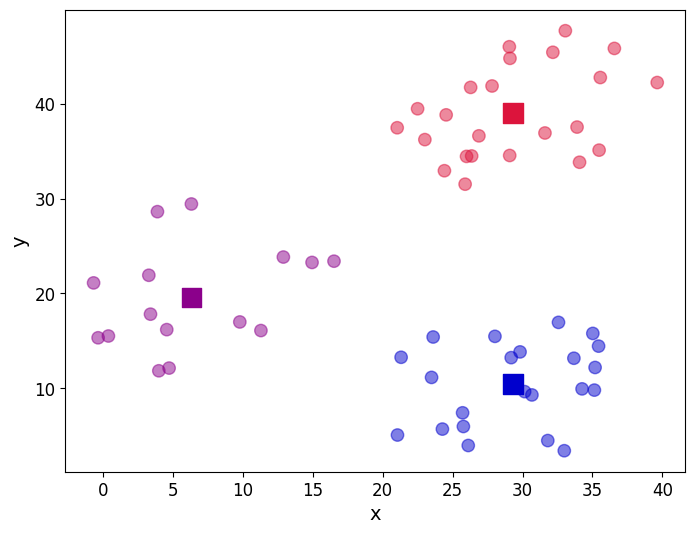

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o', 
            c=df['centroid'].astype('category'), 
            cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], 
            marker='s', s=200, c=[0, 1, 2], 
            cmap=customcmap)

ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

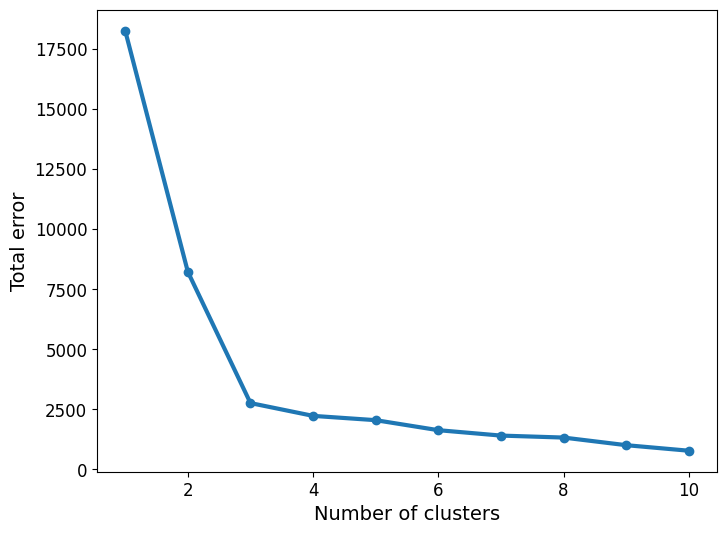

In [32]:
err_total = []
n = 10

df_elbow = blobs[['x', 'y']]

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i + 1)
    err_total.append(sum(my_errs))

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, n + 1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### 2. K-medians algorithm

In [33]:
def sad_err(a, b):
    '''
    Calculate the sum of absolute differences (Manhattan distance).
    a and b are numpy arrays or pandas series
    '''
    return np.sum(np.abs(a - b))

In [34]:

def centroid_assignation_median(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid based on Sum of Absolute Differences.
    - dset: pandas dataframe with observations
    - centroids: pandas dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs_idx in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid_idx in range(k):
            err = sad_err(centroids.iloc[centroid_idx, :], dset.iloc[obs_idx, :])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid = np.where(all_errors == np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors


In [35]:
def kmedians(dset, k=2, tol=1e-4):
    '''
    K-medians implementation for a
    `dset`: DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    working_dset = dset.copy()

    err = []
    goahead = True
    j = 0

    centroids = initiate_centroids(k, dset) 

    while(goahead):

        working_dset['centroid'], j_err = centroid_assignation_median(working_dset, centroids)
        err.append(sum(j_err))

        centroids = working_dset.groupby('centroid').median().reset_index(drop=True)

        if j > 0:
            if err[j-1] - err[j] <= tol:
                goahead = False
        j += 1

    return working_dset['centroid'], j_err, centroids

In [36]:
np.random.seed(432) 
df_kmedians = blobs[['x', 'y']].copy() 
df_kmedians['centroid'], df_kmedians['error'], centroids_kmedians = kmedians(df_kmedians[['x', 'y']], 3)
print("Data points with assigned centroids (K-medians):")
print(df_kmedians.head())
print("\nFinal centroids (K-medians):")
print(centroids_kmedians)

Data points with assigned centroids (K-medians):
        x       y  centroid    error
0  24.412  32.932         0   9.2470
1  35.190  12.189         1   6.8565
2  26.288  41.718         0   6.9510
3   0.376  15.506         2   6.4780
4  26.116   3.963         1  10.4435

Final centroids (K-medians):
        x        y
0  29.056  37.5350
1  29.986  10.5365
2   4.550  17.8100


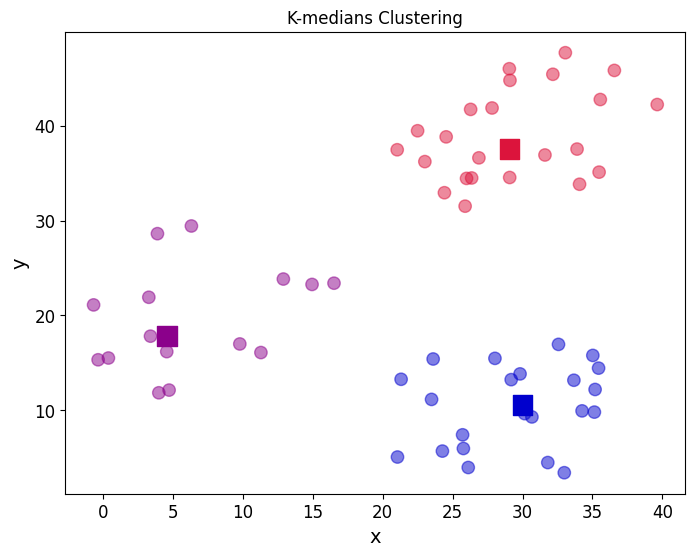

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df_kmedians.iloc[:, 0], df_kmedians.iloc[:, 1], marker='o', 
            c=df_kmedians['centroid'].astype('category'), 
            cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids_kmedians.iloc[:, 0], centroids_kmedians.iloc[:, 1], 
            marker='s', s=200, 
            c=list(range(centroids_kmedians.shape[0])), 
            cmap=customcmap)

ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('K-medians Clustering')
plt.show()

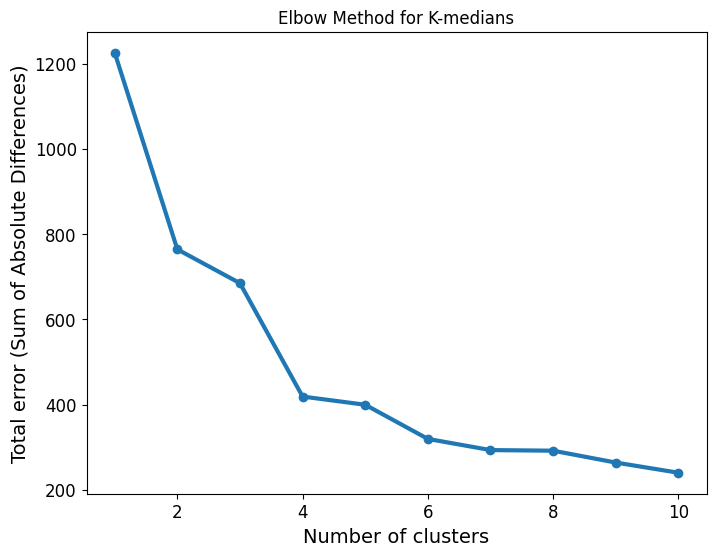

In [38]:
err_total_kmedians = []
n = 10 

df_elbow_kmedians = blobs[['x', 'y']].copy()

for i in range(n):
    _, my_errs, _ = kmedians(df_elbow_kmedians, i + 1)
    err_total_kmedians.append(sum(my_errs))

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, n + 1), err_total_kmedians, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error (Sum of Absolute Differences)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Elbow Method for K-medians')
plt.show()